In [2]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
coordinates

[(36.4844449589643, 169.7852353295384),
 (-3.434889491336179, 145.24651864310533),
 (-26.364766556741017, 159.00650967357092),
 (3.1491401147820994, -39.67123053185895),
 (52.061001862828675, -168.71856555852236),
 (75.70547041636297, 98.25769768945554),
 (8.423063953010896, -51.7644292916585),
 (54.50205397413873, 1.112399007815469),
 (-5.9453153387276245, 16.303076109350883),
 (6.503468748805048, 117.08569628182272),
 (89.12716567049361, -17.429184249090014),
 (-55.160452688491766, 96.89240512912721),
 (-38.17481512696987, 4.719100789715441),
 (44.336927568882544, 93.95278601400412),
 (-70.12265372189262, 173.1552373005037),
 (-75.8453925968513, -148.2595122751328),
 (-45.4199481042706, 6.709605127411834),
 (40.82528202341075, 132.50236740386805),
 (74.73478009125296, -12.116152254165115),
 (-86.23262897862122, -10.435525374137569),
 (20.270373967873923, 1.9728195194906846),
 (-83.21399953631456, 146.3526848268874),
 (-41.739319396336576, -105.63512939861322),
 (4.336900165498648, 21

In [6]:
from citipy import citipy

In [7]:
#Create a list for holding cities
cities = []
# Identify the nearst city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm suficcient count
len(cities)

614

In [8]:
cities

['nikolskoye',
 'angoram',
 'gold coast',
 'acarau',
 'bethel',
 'khatanga',
 'sinnamary',
 'bridlington',
 'kasongo-lunda',
 'kudat',
 'illoqqortoormiut',
 'busselton',
 'saldanha',
 'hami',
 'bluff',
 'mataura',
 'cape town',
 'vrangel',
 'husavik',
 'hermanus',
 'tessalit',
 'hobart',
 'ancud',
 'mobaye',
 'punta arenas',
 'saryshagan',
 'albany',
 'mar del plata',
 'puerto ayora',
 'jamestown',
 'oranjestad',
 'yellowknife',
 'atuona',
 'lagoa',
 'dikson',
 'elko',
 'ushuaia',
 'ribeira grande',
 'georgetown',
 'grand forks',
 'barrow',
 'saskylakh',
 'saint-philippe',
 'cabedelo',
 'keetmanshoop',
 'clearlake',
 'wulanhaote',
 'port elizabeth',
 'saleaula',
 'vardo',
 'sao filipe',
 'deep river',
 'zhigansk',
 'kununurra',
 'svetlyy',
 'sumenep',
 'mahebourg',
 'lata',
 'east london',
 'rikitea',
 'bredasdorp',
 'carnarvon',
 'tabou',
 'faanui',
 'ixtapa',
 'shelburne',
 'coquimbo',
 'pemangkat',
 'palabuhanratu',
 'rawson',
 'santa cruz',
 'ponta do sol',
 'chowchilla',
 'hadejia

In [9]:
# Import requestes
import requests
# Import the API Key
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid='+ weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7d880ac315645e0386736d5ad7db6a46


In [11]:
#Import the datetime module from the datetime library
from datetime import datetime

In [12]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group the cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ','+')
    
#Log the URL, record and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
# #Add one to the record_count
    record_count += 1
# #Run an API reqeust for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

            #Parse ou the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
            #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
            #Append the city information into city_data list
        city_data.append({'City': city.title(),
                              'Lat': city_lat,
                              'Lng': city_lng,
                              'Max Temp': city_max_temp,
                              'Humidity': city_humidity,
                              'Cloudiness': city_clouds,
                              'Wind Speed': city_wind,
                              'Country': city_country,
                              'Date': city_date})
# If an error is experienced, skip the city
    except:
        print('City not found.Skipping...')
        pass

#Indicate that Data Loading is complete
print('---------------------------')
print('Data Retrieval Complete    ')
print('---------------------------')
        
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | angoram
Processing Record 3 of Set 1 | gold coast
Processing Record 4 of Set 1 | acarau
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | sinnamary
Processing Record 8 of Set 1 | bridlington
Processing Record 9 of Set 1 | kasongo-lunda
Processing Record 10 of Set 1 | kudat
Processing Record 11 of Set 1 | illoqqortoormiut
City not found.Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | hami
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | vrangel
Processing Record 19 of Set 1 | husavik
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | tessalit
Processing Record 22 of Set 1 | hobart
Processing Record

Processing Record 40 of Set 4 | padang
Processing Record 41 of Set 4 | yingcheng
Processing Record 42 of Set 4 | upernavik
Processing Record 43 of Set 4 | am timan
Processing Record 44 of Set 4 | ko samui
Processing Record 45 of Set 4 | bandarbeyla
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | portland
Processing Record 48 of Set 4 | iqaluit
Processing Record 49 of Set 4 | nizhneyansk
City not found.Skipping...
Processing Record 50 of Set 4 | noyabrsk
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | east wenatchee bench
Processing Record 3 of Set 5 | srednekolymsk
Processing Record 4 of Set 5 | viligili
City not found.Skipping...
Processing Record 5 of Set 5 | hilo
Processing Record 6 of Set 5 | itarema
Processing Record 7 of Set 5 | brodokalmak
Processing Record 8 of Set 5 | esil
Processing Record 9 of Set 5 | santa rosa
Processing Record 10 of Set 5 | severo-kurilsk
Processing Record 11 of Set 5 | yar-sale
Processing Record 12 of S

Processing Record 31 of Set 8 | rudnogorsk
Processing Record 32 of Set 8 | tome-acu
City not found.Skipping...
Processing Record 33 of Set 8 | kinanah
City not found.Skipping...
Processing Record 34 of Set 8 | rayong
Processing Record 35 of Set 8 | pilar
Processing Record 36 of Set 8 | pevek
Processing Record 37 of Set 8 | port blair
Processing Record 38 of Set 8 | ambovombe
Processing Record 39 of Set 8 | belushya guba
City not found.Skipping...
Processing Record 40 of Set 8 | saint-georges
Processing Record 41 of Set 8 | fukue
Processing Record 42 of Set 8 | odweyne
Processing Record 43 of Set 8 | ocos
Processing Record 44 of Set 8 | nisia floresta
Processing Record 45 of Set 8 | broome
Processing Record 46 of Set 8 | destin
Processing Record 47 of Set 8 | ardakan
Processing Record 48 of Set 8 | polunochnoye
Processing Record 49 of Set 8 | san luis
Processing Record 50 of Set 8 | yeppoon
Processing Record 1 of Set 9 | jalu
Processing Record 2 of Set 9 | csokmo
Processing Record 3 of 

Processing Record 22 of Set 12 | san jose
Processing Record 23 of Set 12 | talcahuano
Processing Record 24 of Set 12 | fukuma
Processing Record 25 of Set 12 | iquique
Processing Record 26 of Set 12 | san angelo
Processing Record 27 of Set 12 | rungata
City not found.Skipping...
Processing Record 28 of Set 12 | bataipora
Processing Record 29 of Set 12 | taoudenni
Processing Record 30 of Set 12 | krutinka
Processing Record 31 of Set 12 | pulaski
Processing Record 32 of Set 12 | moron de la frontera
Processing Record 33 of Set 12 | la ronge
Processing Record 34 of Set 12 | george town
Processing Record 35 of Set 12 | altamira
Processing Record 36 of Set 12 | catamarca
Processing Record 37 of Set 12 | akyab
Processing Record 38 of Set 12 | saint-augustin
Processing Record 39 of Set 12 | oranjemund
Processing Record 40 of Set 12 | paradwip
City not found.Skipping...
Processing Record 41 of Set 12 | monroe
Processing Record 42 of Set 12 | harwich
Processing Record 43 of Set 12 | kumher
Proce

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.70,30.79,36.00,93,75,6.71,RU,2020-11-26 04:12:19
1,Angoram,-4.06,144.07,92.57,55,61,2.28,PG,2020-11-26 04:12:19
2,Gold Coast,-28.00,153.43,82.00,57,6,12.75,AU,2020-11-26 04:09:57
3,Acarau,-2.89,-40.12,79.29,77,0,14.61,BR,2020-11-26 04:12:20
4,Bethel,41.37,-73.41,46.00,81,90,3.67,US,2020-11-26 04:12:20
...,...,...,...,...,...,...,...,...,...
558,Dali,25.70,100.18,62.31,37,93,2.24,CN,2020-11-26 04:13:40
559,Kinsale,51.71,-8.53,39.20,86,40,6.93,IE,2020-11-26 04:13:41
560,Neiafu,-18.65,-173.98,80.60,78,90,11.41,TO,2020-11-26 04:13:41
561,Garowe,8.41,48.48,73.40,61,5,11.30,SO,2020-11-26 04:13:41


In [15]:
# Rearrange columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2020-11-26 04:12:19,59.70,30.79,36.00,93,75,6.71
1,Angoram,PG,2020-11-26 04:12:19,-4.06,144.07,92.57,55,61,2.28
2,Gold Coast,AU,2020-11-26 04:09:57,-28.00,153.43,82.00,57,6,12.75
3,Acarau,BR,2020-11-26 04:12:20,-2.89,-40.12,79.29,77,0,14.61
4,Bethel,US,2020-11-26 04:12:20,41.37,-73.41,46.00,81,90,3.67
...,...,...,...,...,...,...,...,...,...
558,Dali,CN,2020-11-26 04:13:40,25.70,100.18,62.31,37,93,2.24
559,Kinsale,IE,2020-11-26 04:13:41,51.71,-8.53,39.20,86,40,6.93
560,Neiafu,TO,2020-11-26 04:13:41,-18.65,-173.98,80.60,78,90,11.41
561,Garowe,SO,2020-11-26 04:13:41,8.41,48.48,73.40,61,5,11.30


In [16]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data inta a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant field from the DataFram for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

<function matplotlib.pyplot.show(close=None, block=None)>

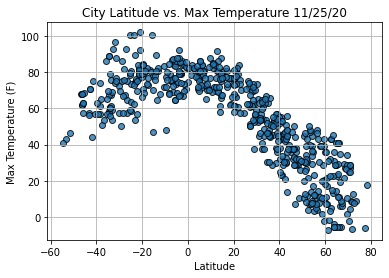

In [23]:
# Import time module
import time

#Build the scatter plot for latitude vs msx tempertaur
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

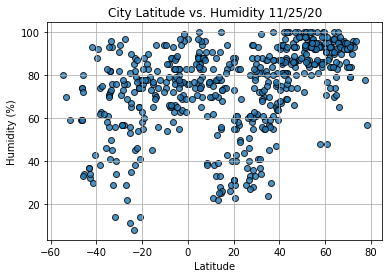

In [24]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

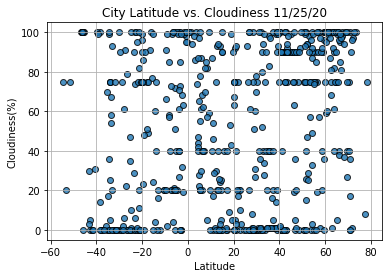

In [25]:
#Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show

In [ ]:
#Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind(%)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show